# Perceptron

## Importar librerías

Importamos las librerías necesarias

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Import from scikit-learn
from sklearn import datasets
# from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

# Import from datetime
from datetime import datetime

## Cargar dataset

In [16]:
digits = np.loadtxt("../data/optdigits.tra", dtype=int, delimiter=',')
(n_samples, n_features) = digits.shape

In [20]:
# The digits dataset, test set
digits_test = datasets.load_digits()
n_samples_test = len(digits_test.images)

print(digits_test.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

## Visualización de los datos

Aumentamos el tamaño de las figuras para que las imágenes sean más visibles.

In [36]:
# Increase de figure size
plt.rcParams['figure.dpi'] = 150

Realizamos una visualización de las primeras 10 imágenes del dataset.

Showing first 10 digit images


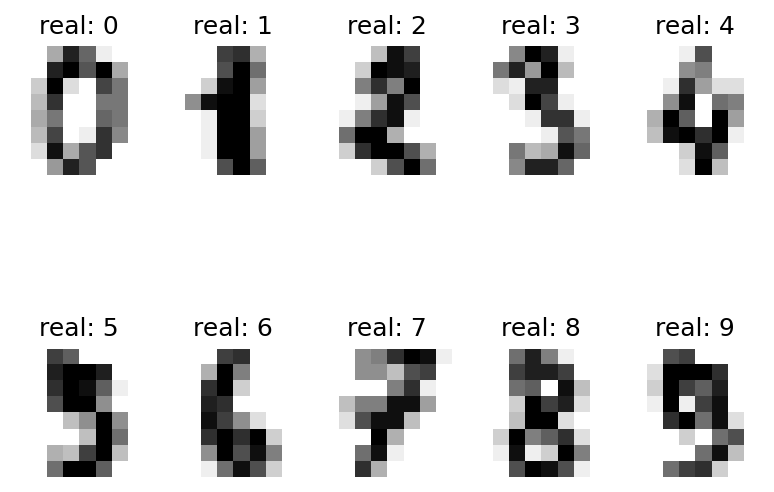

In [21]:
n_img_plt = 10

print("Showing first %d digit images" % n_img_plt)

_, axes = plt.subplots(2, n_img_plt//2)
images_and_labels = list(zip(digits_test.images[:n_img_plt], digits_test.target[:n_img_plt]))
for ax, (image, label) in zip(np.concatenate(axes), images_and_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('real: %i' % label)

plt.show()

## Data Preprocessing

Preprocesamos los datos para que puedan ser utilizados por el modelo.

El tamaño de entrenamiento es del 75% de los datos y el tamaño de prueba es del 25% de los datos.

In [22]:
train_size = 0.75
test_size = 1 - train_size

print("Preprocessing data, %d%% for training and %d%% for validation" % (train_size * 100, test_size * 100))

# scale inputs and flatten images
patterns_input = digits[:, :n_features-1] / 16.
input_test = digits_test.images.reshape((n_samples_test, -1)) / 16.

# targets
patterns_target = digits[:, -1]
target_test = digits_test.target

# Split and shuffle patterns
input_train, input_valid, target_train, target_valid = train_test_split(
    patterns_input, patterns_target, train_size=train_size, test_size=test_size,
    random_state=0, shuffle=True)

# Print data sets cardinality
print("Number of patterns in train set: %d" % len(target_train))
print("Number of patterns in valid set: %d" % len(target_valid))
print("Number of patterns in test set: %d" % len(target_test))

Preprocessing data, 75% for training and 25% for validation
Number of patterns in train set: 2867
Number of patterns in valid set: 956
Number of patterns in test set: 1797


## Modelar Perceptron

In [23]:
max_iter = 30

print("Learning a Perceptron with %d maximum number of iterations and ..." % max_iter)

per = Perceptron(max_iter=max_iter, shuffle=False, verbose=True)
per.fit(input_train, target_train)

# Results
print("Printing Perceptron results")

predict_train = per.predict(input_train)
predict_valid = per.predict(input_valid)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

Learning a Perceptron with 30 maximum number of iterations and ...
-- Epoch 1
Norm: 21.39, NNZs: 53, Bias: -5.000000, T: 2867, Avg. loss: 0.056825
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 26.22, NNZs: 55, Bias: -6.000000, T: 5734, Avg. loss: 0.024072
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 30.38, NNZs: 56, Bias: -7.000000, T: 8601, Avg. loss: 0.011430
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 32.33, NNZs: 57, Bias: -8.000000, T: 11468, Avg. loss: 0.013570
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 33.06, NNZs: 55, Bias: -9.000000, T: 14335, Avg. loss: 0.019978
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 33.58, NNZs: 57, Bias: -9.000000, T: 17202, Avg. loss: 0.010176
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 35.11, NNZs: 57, Bias: -9.000000, T: 20069, Avg. loss: 0.006111
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 36.07, NNZs: 57, Bias: -10.000000, T: 22936, Avg. loss: 0.011017
Total training time: 0.00 seconds.
-- Epoc

## Modelar MLP

In [24]:
# Modeling MLP
# ------------
# Function to training and validate MLP
def MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, verbose):
    """
    Train and valid MLP every valid_cycles iterations
    """
    classes  = np.unique(target_train)
    loss_valid = []
    for i in range(max_iter//valid_cycles):
        for j in range(valid_cycles):
            out = mlp.partial_fit(input_train, target_train, classes)
            # Calculate loss function of valid set
        last_lost_valid = log_loss(target_valid, mlp.predict_proba(input_valid))
        loss_valid.append(last_lost_valid)
        if verbose:
            print("Iteration %d, train loss = %.8f, valid loss = %.8f" %
                  (mlp.n_iter_, mlp.loss_, last_lost_valid))
        if early_stopping and (i > 0) and (last_lost_valid > loss_valid[-2]): # Early stopping
            if verbose:
                print("Early stopping: Validation score did not improve")
            break
    if verbose: print(out)
    if verbose:
        # Visualizing the Cost Function Trajectory
        # (https://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html#Visualizing-the-Cost-Function-Trajectory)
        print("Visualizing the Cost Function Trajectory")
        plt.plot(range(1, len(mlp.loss_curve_)+1), mlp.loss_curve_, label='Train loss')
        plt.plot(range(valid_cycles,len(loss_valid)*valid_cycles+valid_cycles,valid_cycles), loss_valid, '-o', label='Valid loss')
        plt.xlabel('number of iterations')
        plt.ylabel('loss function')
        plt.legend(loc='upper right')
        plt.show()

### MLP con n_hidden neuronas ocultas

Learning a MLP with 60 hidden neurons, 300 maximum number of iterations and 0.00100000 learning rate ...
Iteration 1, train loss = 1.45721410, valid loss = 1.34168537
Iteration 1, train loss = 0.68608528, valid loss = 0.64179998
Iteration 1, train loss = 0.37861924, valid loss = 0.37121381
Iteration 1, train loss = 0.26170688, valid loss = 0.26460368
Iteration 1, train loss = 0.20134851, valid loss = 0.20812804
Iteration 1, train loss = 0.16532717, valid loss = 0.17446236
Iteration 1, train loss = 0.14047095, valid loss = 0.15175895
Iteration 1, train loss = 0.12216185, valid loss = 0.13546013
Iteration 1, train loss = 0.10821937, valid loss = 0.12397071
Iteration 1, train loss = 0.09715307, valid loss = 0.11520259
Iteration 1, train loss = 0.08811606, valid loss = 0.10842173
Iteration 1, train loss = 0.08048975, valid loss = 0.10295672
Iteration 1, train loss = 0.07400960, valid loss = 0.09866531
Iteration 1, train loss = 0.06837748, valid loss = 0.09521559
Iteration 1, train loss = 0

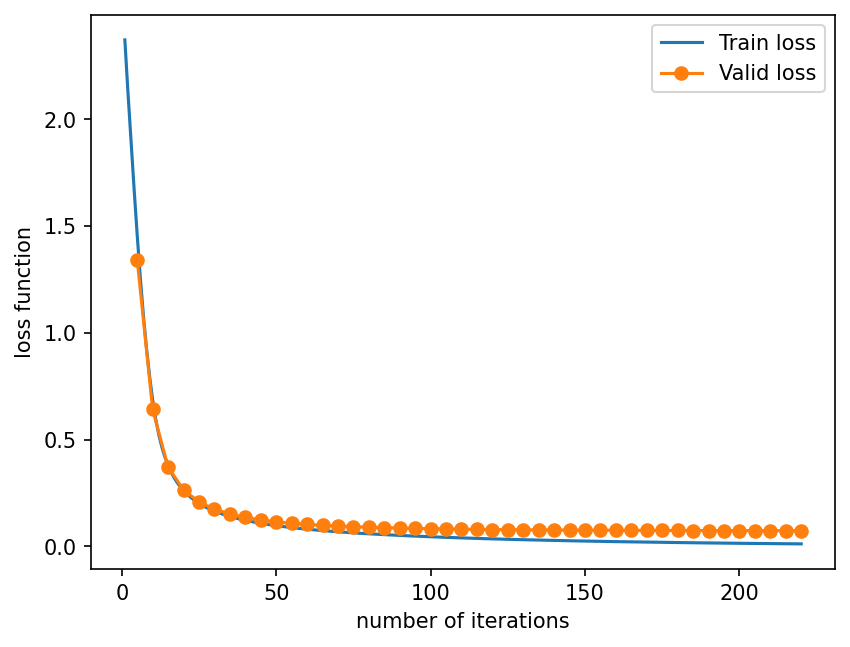

In [25]:
n_hidden = 60
max_iter = 300
learning_rate_init = 0.001
valid_cycles = 5
early_stopping = True

print("Learning a MLP with %d hidden neurons, %d maximum number of iterations and %.8f learning rate ..." % (n_hidden, max_iter, learning_rate_init))

mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=0, verbose=False)

MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, True)

## Resultados Iniciales

Printing initial results
Train accuracy: 99.965%
Valid accuracy: 97.699%
Train confusion matrix:
[[275   0   0   0   0   0   0   0   0   0]
 [  0 289   0   0   0   0   0   0   0   0]
 [  0   0 284   0   0   0   0   0   0   0]
 [  0   0   0 294   0   1   0   0   0   0]
 [  0   0   0   0 299   0   0   0   0   0]
 [  0   0   0   0   0 290   0   0   0   0]
 [  0   0   0   0   0   0 281   0   0   0]
 [  0   0   0   0   0   0   0 292   0   0]
 [  0   0   0   0   0   0   0   0 281   0]
 [  0   0   0   0   0   0   0   0   0 281]]


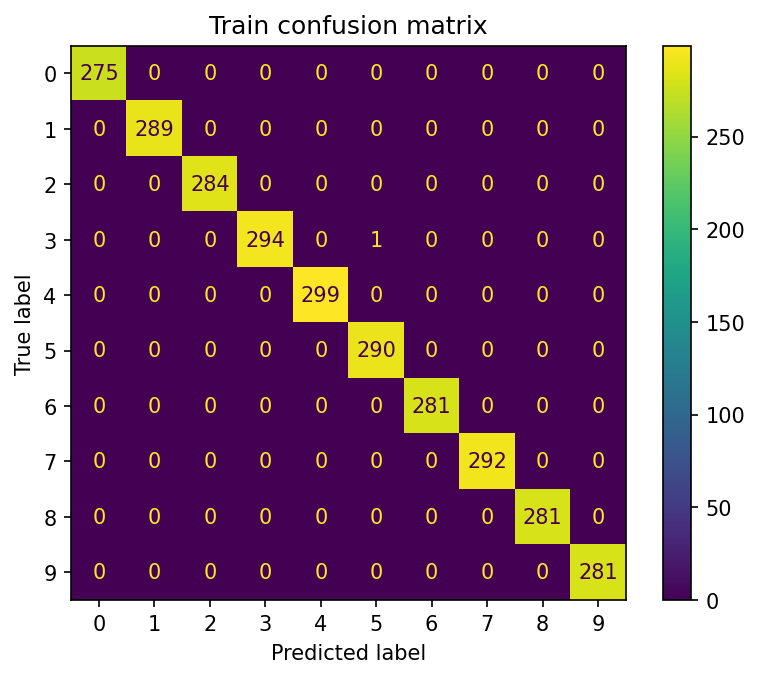

Valid confusion matrix:
[[98  0  1  0  0  0  1  0  1  0]
 [ 0 97  0  0  0  0  0  2  1  0]
 [ 0  0 95  0  0  0  1  0  0  0]
 [ 0  0  0 94  0  0  0  0  0  0]
 [ 0  0  0  0 85  0  1  0  0  2]
 [ 0  0  0  1  0 82  0  0  0  3]
 [ 0  1  0  0  0  0 95  0  0  0]
 [ 0  0  0  0  0  0  0 95  0  0]
 [ 0  1  0  1  0  0  2  0 95  0]
 [ 0  0  0  1  1  0  0  0  1 98]]


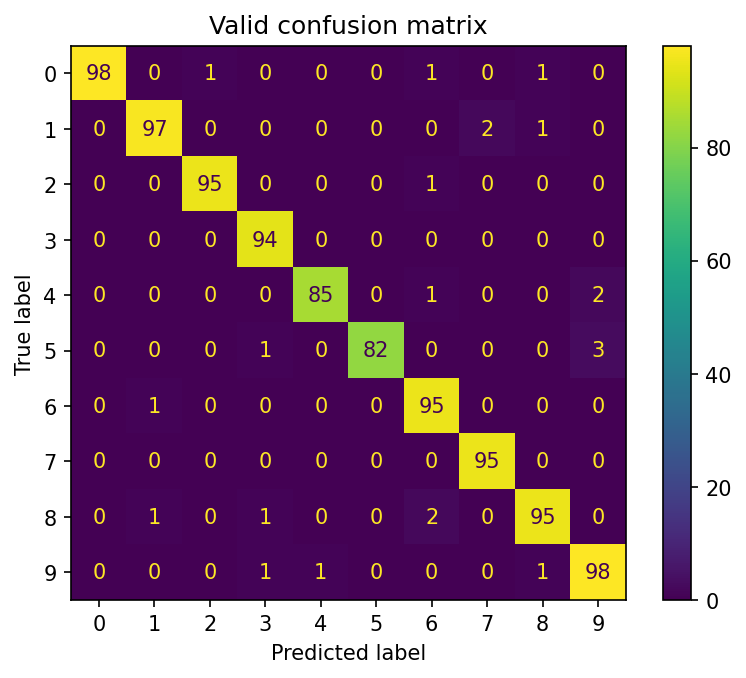

Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       289
           2       1.00      1.00      1.00       284
           3       1.00      1.00      1.00       295
           4       1.00      1.00      1.00       299
           5       1.00      1.00      1.00       290
           6       1.00      1.00      1.00       281
           7       1.00      1.00      1.00       292
           8       1.00      1.00      1.00       281
           9       1.00      1.00      1.00       281

    accuracy                           1.00      2867
   macro avg       1.00      1.00      1.00      2867
weighted avg       1.00      1.00      1.00      2867

Valid classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       101
           1       0.98      0.97      0.97       100
           2       0

In [35]:
print("Printing initial results")

predict_train = mlp.predict(input_train)
predict_valid = mlp.predict(input_valid)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

train_confusion_matrix = confusion_matrix(target_train, predict_train)
print("Train confusion matrix:")
print(train_confusion_matrix)
ConfusionMatrixDisplay(train_confusion_matrix).plot()
plt.title("Train confusion matrix")
plt.show()

valid_confusion_matrix = confusion_matrix(target_valid, predict_valid)
print("Valid confusion matrix:")
print(valid_confusion_matrix)
ConfusionMatrixDisplay(valid_confusion_matrix).plot()
plt.title("Valid confusion matrix")
plt.show()

print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))

## Optimizar el ritmo de aprendizaje

Learning rate optimization
Number of seconds for training: 3
Visualizing the Cost Function Trajectory with different learning rates


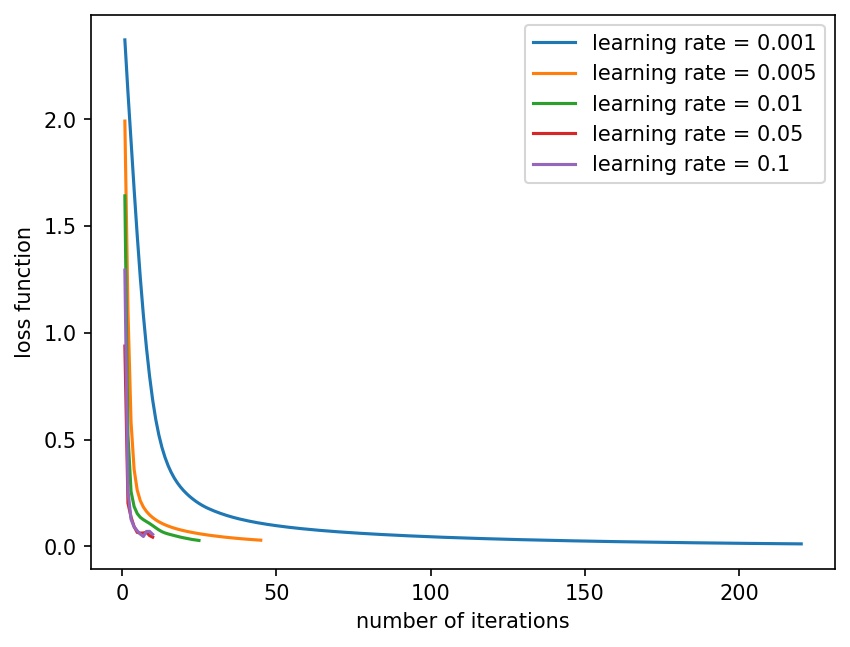

In [38]:
# Learning rate optimization
# ------------
# Test with different learning_rate_init
print("Learning rate optimization")

tests_learning_rate_init = [0.001, 0.005, 0.01, 0.05, 0.1]
activation = 'relu'
random_state = 0

now = datetime.now()
loss_curves =  []
for lr in tests_learning_rate_init:
    mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=lr, shuffle=False, random_state=random_state, verbose=False, activation=activation)
    MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
    
    loss_curves.append(mlp.loss_curve_)

print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())

# Show results
print("Visualizing the Cost Function Trajectory with different learning rates")
for (lr, loss_curve) in zip(tests_learning_rate_init, loss_curves):
    plt.plot(range(1, len(loss_curve)+1), loss_curve, label='learning rate = ' + str(lr))

plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.legend(loc='upper right')
plt.show()

## Optimización de arquitectura

In [39]:
# Architecture optimization
# ------------
print("Architecture optimization")

# Test MLP with differents number of hidden units and several repetitions
tests_n_hidden = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190]
n_reps = 10
# n_reps = 20
activation = 'relu'
# activation = 'logistic'
# learning_rate_init = 0.001
# learning_rate_init = 0.01
learning_rate_init = 0.005

now = datetime.now()
best_mlp = []
best_acc = 0.0
accs_train = []
accs_valid = []
for n_hidden in tests_n_hidden:
    max_acc_train = max_acc_valid = 0.0
    for random_state in range(n_reps):
        mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=random_state, verbose=False, activation=activation)
        MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
        
        acc_train = accuracy_score(target_train, mlp.predict(input_train))
        acc_valid = accuracy_score(target_valid,mlp.predict(input_valid))
        print("Seed = %d, train acc = %.8f, valid acc = %.8f, iterations = %d" % (random_state, acc_train, acc_valid, len(mlp.loss_curve_)))
        if (max_acc_valid < acc_valid):
            max_acc_valid = acc_valid
            max_acc_train = acc_train
            if (acc_valid > best_acc):
                best_acc = acc_valid
                best_mlp = mlp
    accs_train.append(max_acc_train)
    accs_valid.append(max_acc_valid)
    print("Number hidden units = %i, train acc = %.8f, max valid acc = %.8f" % (n_hidden, max_acc_train, max_acc_valid))

print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best MLP valid accuracy: %.8f%%" % (best_acc * 100))
print("Best MLP: ", best_mlp)

Architecture optimization
Seed = 0, train acc = 0.98709452, valid acc = 0.96652720, iterations = 105
Seed = 1, train acc = 0.98116498, valid acc = 0.96129707, iterations = 85
Seed = 2, train acc = 0.98848971, valid acc = 0.97907950, iterations = 85
Seed = 3, train acc = 0.98988490, valid acc = 0.97175732, iterations = 90
Seed = 4, train acc = 0.99093129, valid acc = 0.96966527, iterations = 90
Seed = 5, train acc = 0.98430415, valid acc = 0.96234310, iterations = 90
Seed = 6, train acc = 0.99302407, valid acc = 0.97071130, iterations = 105
Seed = 7, train acc = 0.99162888, valid acc = 0.97280335, iterations = 95
Seed = 8, train acc = 0.98116498, valid acc = 0.96443515, iterations = 80
Seed = 9, train acc = 0.98500174, valid acc = 0.96757322, iterations = 90
Number hidden units = 10, train acc = 0.98848971, max valid acc = 0.97907950
Seed = 0, train acc = 0.99441925, valid acc = 0.98012552, iterations = 60
Seed = 1, train acc = 0.99720963, valid acc = 0.97803347, iterations = 70
Seed = 

### Mostrar resultados

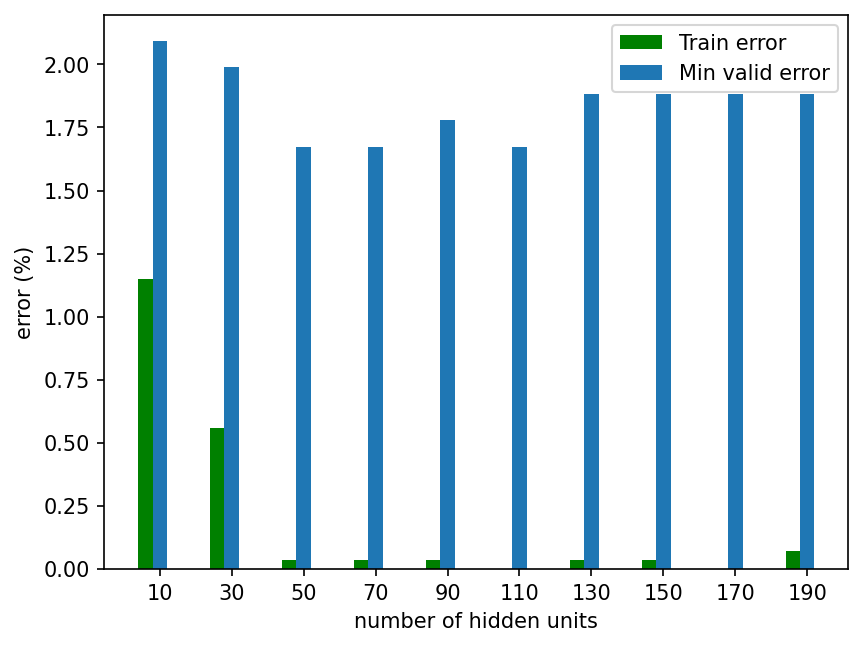

In [40]:
width = 4
plt.bar(np.array(tests_n_hidden) - width, 100 *(1- np.array(accs_train)), color='g', width=width, label='Train error')
plt.bar(np.array(tests_n_hidden), 100 *(1- np.array(accs_valid)), width=width, label='Min valid error')
plt.xlabel('number of hidden units')
plt.ylabel('error (%)')
plt.xticks(np.array(tests_n_hidden), tests_n_hidden)
plt.legend(loc='upper right')
plt.show()

## Resultados Finales del Mejor Modelo

Printing final results
Train accuracy: 99.965%
Valid accuracy: 98.326%
Test accuracy: 95.938%
Train confusion matrix:
[[275   0   0   0   0   0   0   0   0   0]
 [  0 289   0   0   0   0   0   0   0   0]
 [  0   0 284   0   0   0   0   0   0   0]
 [  0   0   0 294   0   1   0   0   0   0]
 [  0   0   0   0 299   0   0   0   0   0]
 [  0   0   0   0   0 290   0   0   0   0]
 [  0   0   0   0   0   0 281   0   0   0]
 [  0   0   0   0   0   0   0 292   0   0]
 [  0   0   0   0   0   0   0   0 281   0]
 [  0   0   0   0   0   0   0   0   0 281]]
Valid confusion matrix:
[[99  0  1  0  0  0  1  0  0  0]
 [ 0 98  0  0  0  0  0  2  0  0]
 [ 0  0 95  0  0  0  0  0  1  0]
 [ 0  0  0 94  0  0  0  0  0  0]
 [ 0  0  0  0 87  0  1  0  0  0]
 [ 0  0  0  1  0 83  0  0  0  2]
 [ 0  1  0  0  0  0 95  0  0  0]
 [ 0  0  0  0  0  0  0 95  0  0]
 [ 0  1  0  0  1  0  0  0 97  0]
 [ 0  0  0  2  1  0  0  0  1 97]]
Test confusion matrix:
[[176   0   0   0   0   2   0   0   0   0]
 [  0 178   0   0   0   0   2 

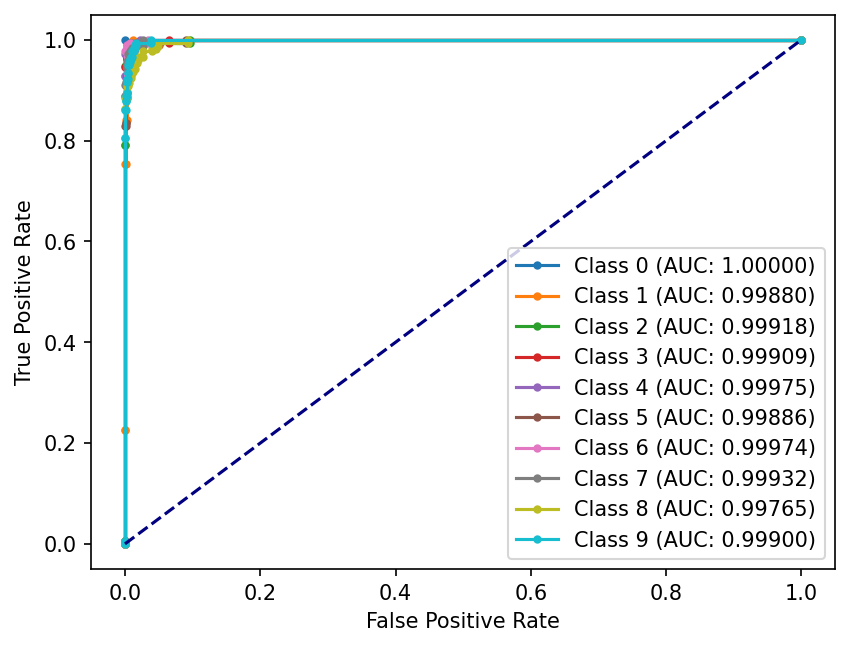

Showing first 8 errors of real class 8


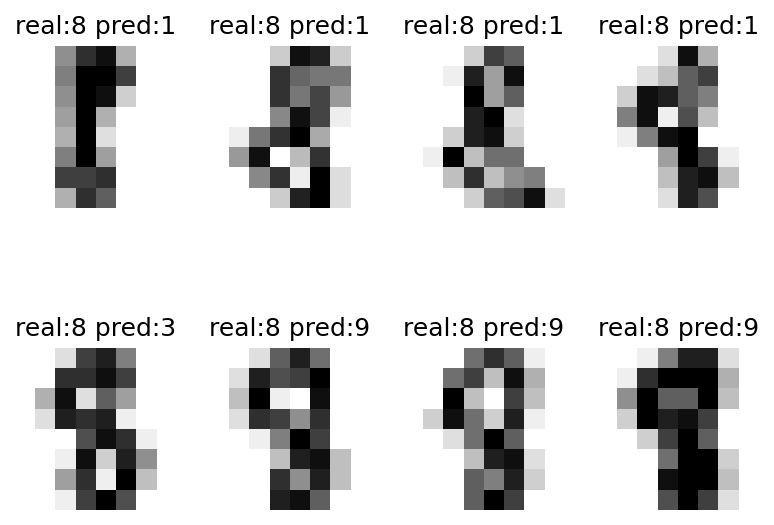

In [41]:
print("Printing final results")

predict_train = best_mlp.predict(input_train)
predict_valid = best_mlp.predict(input_valid)
predict_test = best_mlp.predict(input_test)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Test accuracy: %.3f%%" % (accuracy_score(target_test, predict_test) * 100))

print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Test confusion matrix:")
print(confusion_matrix(target_test, predict_test))

print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))
print("Test classification report:")
print(classification_report(target_test, predict_test))

# ROC curves of test set
mlp_probs = mlp.predict_proba(input_test)
classes  = np.unique(target_train)
mlp_auc = []
mlp_fpr = []
mlp_tpr = []
for cla in classes:
    mlp_auc.append(roc_auc_score(target_test==cla, mlp_probs[:,cla]))
    fpr, tpr, _ = roc_curve(target_test==cla, mlp_probs[:,cla])
    mlp_fpr.append(fpr)
    mlp_tpr.append(tpr)

print("Printing ROC curves of test set")
# plot the roc curve for the model
for cla in classes:
    # plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(mlp_fpr[cla], mlp_tpr[cla], marker='.', label='Class %d (AUC: %.5f)' % (cla, mlp_auc[cla]))

# axis labels
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Show errors on real class 8
real_class = 8
indxs = np.where(digits_test.target == real_class)[0]
indxs_err = indxs[(np.where(predict_test[(indxs)] != real_class)[0])]
preds_err = predict_test[(indxs_err)]
n_img_plt = 8

print("Showing first %d errors of real class %d" % (n_img_plt, real_class))

_, axes = plt.subplots(2, n_img_plt//2)
images_and_labels = list(zip(digits_test.images[(indxs_err)], digits_test.target[(indxs_err)], preds_err))
for ax, (image, label1, label2) in zip(np.concatenate(axes), images_and_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('real:%i pred:%i' % (label1, label2))

plt.show()